Assignment - 4 ( Customer Segmentation Analysis -- Mall_Customers.csv)

Import Libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Load the dataset

In [88]:
df=pd.read_csv("/content/Mall_Customers.csv")

## Visualizations

**Univariate Analysis**

In [89]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [90]:
df.mean()

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [91]:
df.shape

(200, 5)

In [92]:
df.rename(columns={"CustomerID":"customer_id","Gender":"gender","Age":"age","Annual Income (k$)":"annual_income",
                     "Spending Score (1-100)":"spending_scores"},inplace=True)

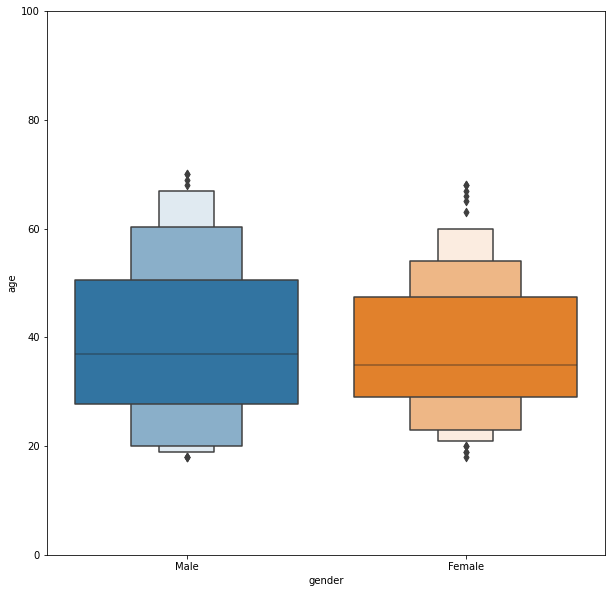

In [93]:
temp = pd.concat([df['age'], df['gender']], axis=1)

f, ax = plt.subplots(figsize=(10,10))
fig = sns.boxenplot(x='gender', y='age', data=df)
fig.axis(ymin=0, ymax=100);

Bi- Variate **Analysis**

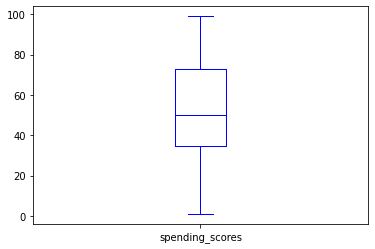

In [94]:
import matplotlib.pyplot as plt
df.boxplot(column=['spending_scores'],grid=False,color='blue')


**Bi- Variate Analysis**

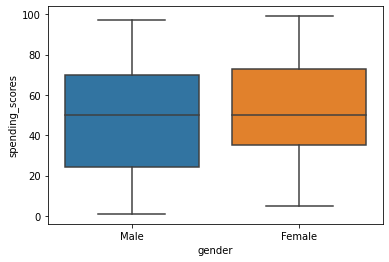

In [95]:
sns.boxplot(x=df['gender'],y=df['spending_scores'])

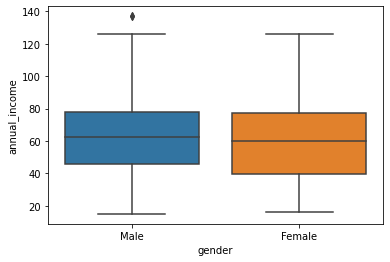

In [96]:
sns.boxplot(x=df['gender'],y=df['annual_income'])

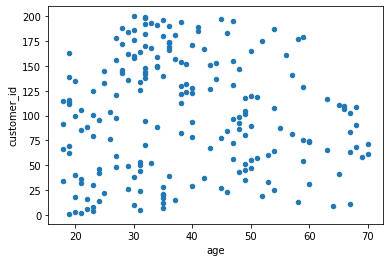

In [97]:
df[df['spending_scores'] <
100].plot.scatter(x='age', y='customer_id')

**Multi-Variate Analysis**

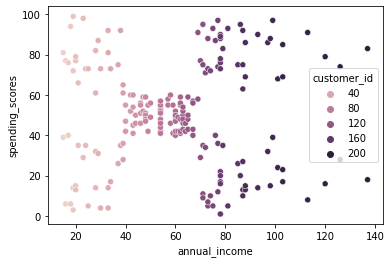

In [98]:
sns.scatterplot(df["annual_income"],df["spending_scores"],hue=df["customer_id"])

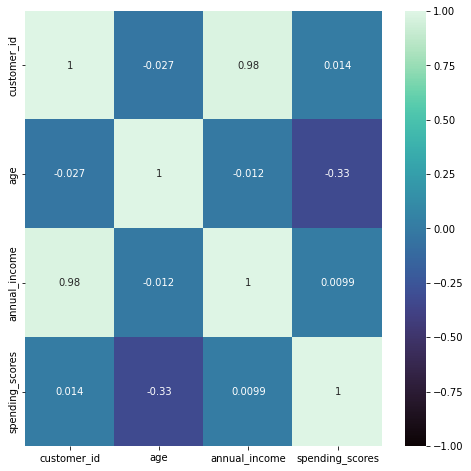

In [99]:
corr=df.corr()
plt.figure(figsize=(8,8))
sn=sns.heatmap(corr,vmin=-1,center=0, annot = True, cmap = 'mako')

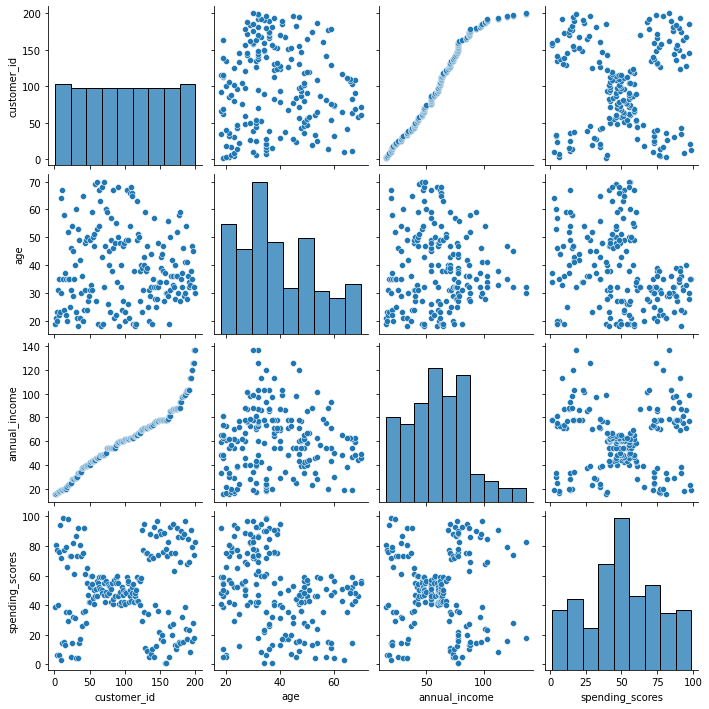

In [100]:
sns.pairplot(df)

# Perform descriptive statistics on the dataset

In [101]:
df.head(10)

,customer_id,gender,age,annual_income,spending_scores
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [102]:
df.shape

(200, 5)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      200 non-null    int64 
 1   gender           200 non-null    object
 2   age              200 non-null    int64 
 3   annual_income    200 non-null    int64 
 4   spending_scores  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [104]:
df.describe()

,customer_id,age,annual_income,spending_scores
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Check for Missing values and deal with them

In [105]:
df.fillna(value = 100)

,customer_id,gender,age,annual_income,spending_scores
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [106]:
df["age"].mean()

38.85

In [107]:
df["age"].median()

36.0

In [108]:
df[df.duplicated()]

,customer_id,gender,age,annual_income,spending_scores


there is no missing values and duplicates in dataframe

# Find the outliers and replace them outliers

In [109]:
for i in df:
    if df[i].dtype=='int64':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])

In [110]:
qnt = df.quantile(q = (0.25,0.75))
qnt


,customer_id,age,annual_income,spending_scores
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [111]:
iqr = qnt.loc[0.75] - qnt.loc[0.25] # IQR = Q3 - Q1
iqr

customer_id        99.50
age                20.25
annual_income      36.50
spending_scores    38.25
dtype: float64

In [112]:
lower = qnt.loc[0.25] - 1.5 * iqr
lower

customer_id       -98.500
age                -1.625
annual_income     -13.250
spending_scores   -22.625
dtype: float64

In [113]:
upper = qnt.loc[0.75] + 1.5 * iqr
upper

customer_id        299.500
age                 79.375
annual_income      132.750
spending_scores    130.375
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5f531ccbd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5f531d0690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5f531cc650>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f531d5190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5f531d56d0>],
 'means': []}

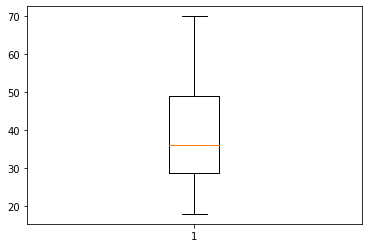

In [114]:
plt.boxplot(df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5f5312dc50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5f53132710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5f5312d6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f53138210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5f53138750>],
 'means': []}

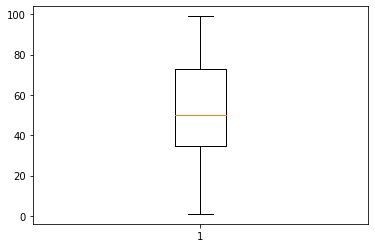

In [115]:
plt.boxplot(df['spending_scores'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5f53116ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5f5311e590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5f53116550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f53125090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5f531255d0>],
 'means': []}

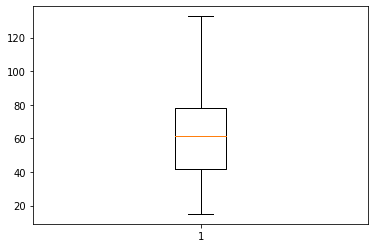

In [116]:
plt.boxplot(df['annual_income'])

# Check for Categorical columns and perform encoding

In [117]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['gender']=encoder.fit_transform(df['gender'])

In [118]:
df.head()

,customer_id,gender,age,annual_income,spending_scores
0,1.0,1,19.0,15.0,39.0
1,2.0,1,21.0,15.0,81.0
2,3.0,0,20.0,16.0,6.0
3,4.0,0,23.0,16.0,77.0
4,5.0,0,31.0,17.0,40.0


# Scaling the data

In [119]:
df.columns

Index(['customer_id', 'gender', 'age', 'annual_income', 'spending_scores'], dtype='object')

In [121]:
x=df[["age","customer_id"]]
x

,age,customer_id
0,19.0,1.0
1,21.0,2.0
2,20.0,3.0
3,23.0,4.0
4,31.0,5.0
...,...,...
195,35.0,196.0
196,45.0,197.0
197,32.0,198.0
198,32.0,199.0


In [122]:
x.head()

,age,customer_id
0,19.0,1.0
1,21.0,2.0
2,20.0,3.0
3,23.0,4.0
4,31.0,5.0


In [123]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
st_scale = scale.fit_transform(x)
st_scale

array([[-1.42456879, -1.7234121 ],
       [-1.28103541, -1.70609137],
       [-1.3528021 , -1.68877065],
       [-1.13750203, -1.67144992],
       [-0.56336851, -1.6541292 ],
       [-1.20926872, -1.63680847],
       [-0.27630176, -1.61948775],
       [-1.13750203, -1.60216702],
       [ 1.80493225, -1.5848463 ],
       [-0.6351352 , -1.56752558],
       [ 2.02023231, -1.55020485],
       [-0.27630176, -1.53288413],
       [ 1.37433211, -1.5155634 ],
       [-1.06573534, -1.49824268],
       [-0.13276838, -1.48092195],
       [-1.20926872, -1.46360123],
       [-0.27630176, -1.4462805 ],
       [-1.3528021 , -1.42895978],
       [ 0.94373197, -1.41163905],
       [-0.27630176, -1.39431833],
       [-0.27630176, -1.3769976 ],
       [-0.99396865, -1.35967688],
       [ 0.51313183, -1.34235616],
       [-0.56336851, -1.32503543],
       [ 1.08726535, -1.30771471],
       [-0.70690189, -1.29039398],
       [ 0.44136514, -1.27307326],
       [-0.27630176, -1.25575253],
       [ 0.08253169,

# Perform any of the clustering algorithms

In [124]:
from sklearn.cluster import KMeans

In [125]:
x.drop('customer_id',axis=1,inplace=True)

In [126]:
km = KMeans(n_clusters=3, random_state=0)

In [127]:
x['Group or Cluster'] = km.fit_predict(x)

In [128]:
x.head()

,age,Group or Cluster
0,19.0,0
1,21.0,0
2,20.0,0
3,23.0,0
4,31.0,0


In [129]:
x['Group or Cluster'].value_counts()

0    104
2     62
1     34
Name: Group or Cluster, dtype: int64

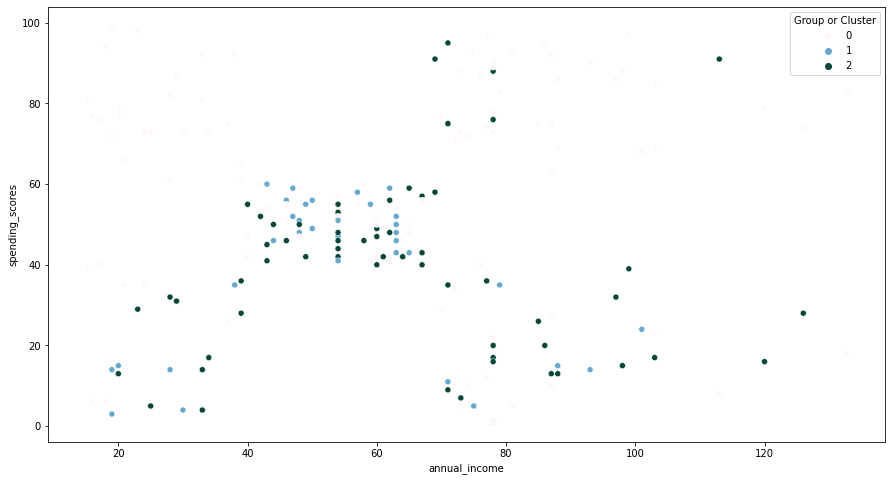

In [137]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=df['annual_income'],
                y=df['spending_scores'],
                hue=x['Group or Cluster'],
                palette='PuBuGn')
plt.show()

In [138]:
from sklearn.metrics import silhouette_score, silhouette_samples
score = silhouette_score(x, 
                         km.labels_, 
                         metric='euclidean')
score

0.5720936424387716

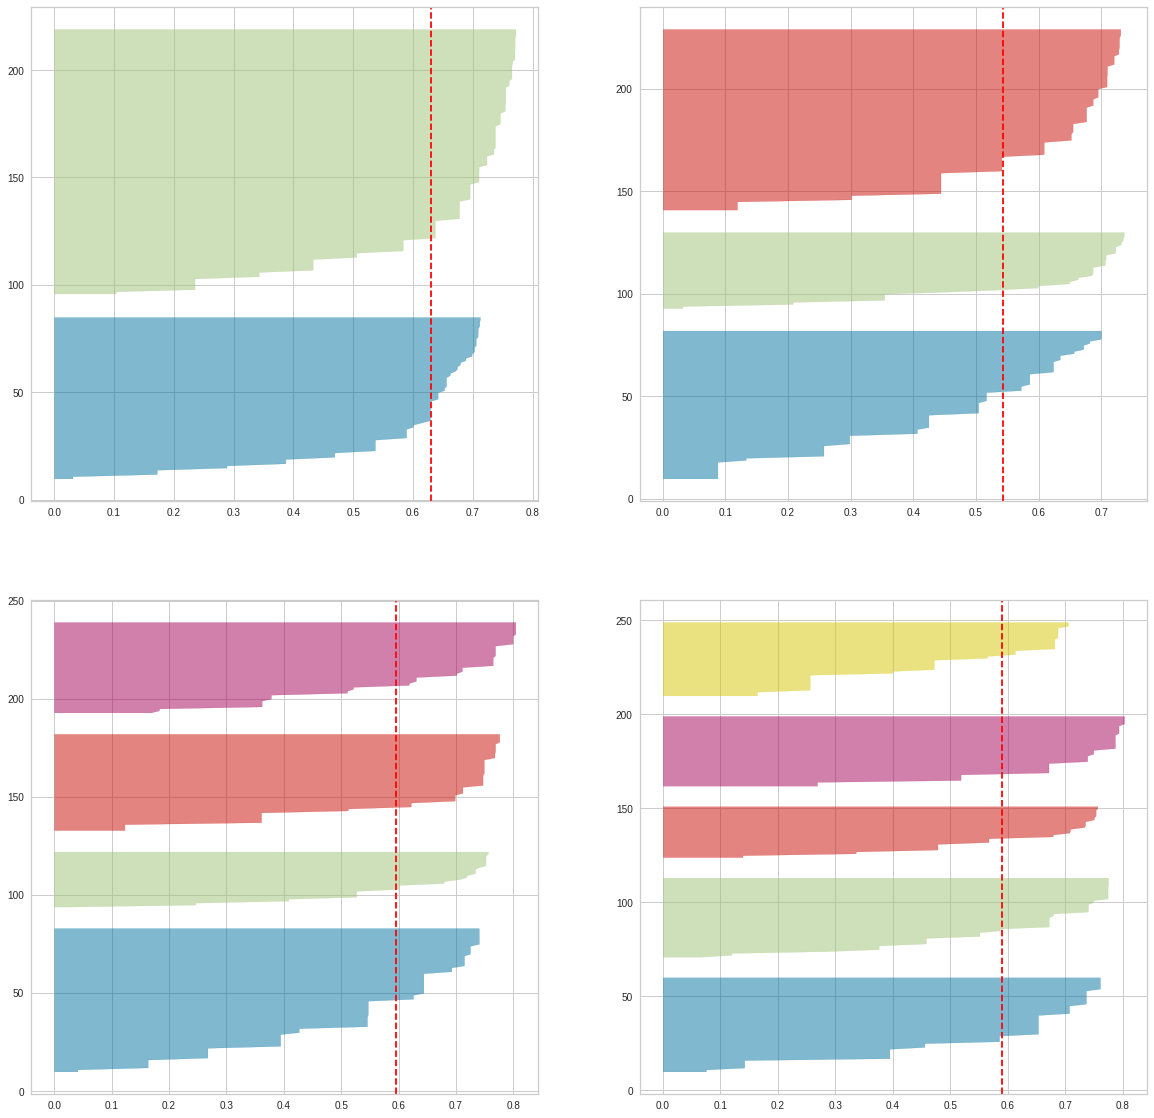

In [139]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(20,20))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=100, 
                random_state=0)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, 
                                      colors='yellowbrick', 
                                      ax=ax[q-1][mod])
    visualizer.fit(x)